<a href="https://colab.research.google.com/github/awe2/MantisShrimp/blob/main/MantisShrimpDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo: Mantis Shrimp Package

This notebook simply allows users to query the Mantis Shrimp model.

1.   Install the mantis shrimp repository and dependencies
2.   Query the model
3.   Visualize the result


NOTE: A user could simply use this interface to perform photo-z calculations on cloud and save to their drive.

### Part I: installing libraries/Packages; download data.

In [ ]:
# import stack
import torch
import astropy
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# We will need these packages for the mantis shrimp pipeline
!pip install dustmaps
!pip install calpit
!pip install spline-basis
!pip install sep-pjw

# Install the Mantis Shrimp Package and download the weights using Github LFS
!apt-get update && apt-get install -y git-lfs
!git lfs install

!git clone https://github.com/pnnl/MantisShrimp.git
%cd MantisShrimp
!git lfs pull

!pip install -e .

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,370 kB]
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,668 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,731 kB]
Get:13 http://archive.ubuntu.com/ubuntu jamm

# Part II: Mantis Shrimp Demo

In [ ]:
#define a helper function
def visualize_cutouts(data):
    """
    helper function to visualize the cutout data. Accepts a tuple of data
    from the mantis shrimp pipeline
    """

    galex, panstarrs, unwise = data[0], data[1], data[2]

    fig = plt.figure(figsize=(10,10))
    filter_names = ['Galex:FUV','Galex:NUV','Panstarrs:g',
                    'Panstarrs:r','Panstarrs:i','Panstarrs:z',
                    'Panstarrs:y','Unwise:W1','Unwise:W2']

    for j in range(0,9):
        plt.subplot(3,3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(filter_names[j])
        if j in [0,1,]:
            if j ==0:
                plt.imshow(galex[0,1])
            if j==1:
                plt.imshow(galex[0,0])
        if j in [2,3,4,5,6]:
            plt.imshow(panstarrs[0,j-2])
        if j in [7,8]:
            plt.imshow(unwise[0,j-7])

    plt.suptitle('Visualize Cutouts')
    plt.show()

0.009610582


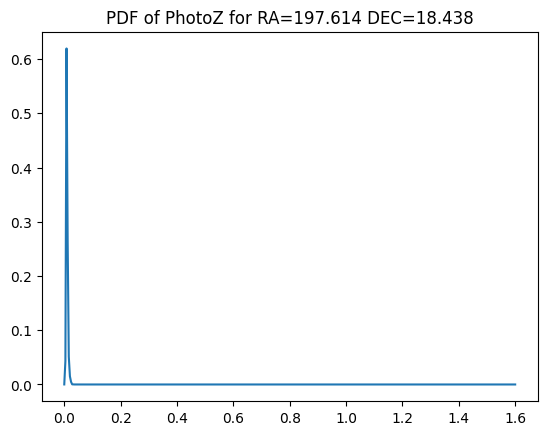

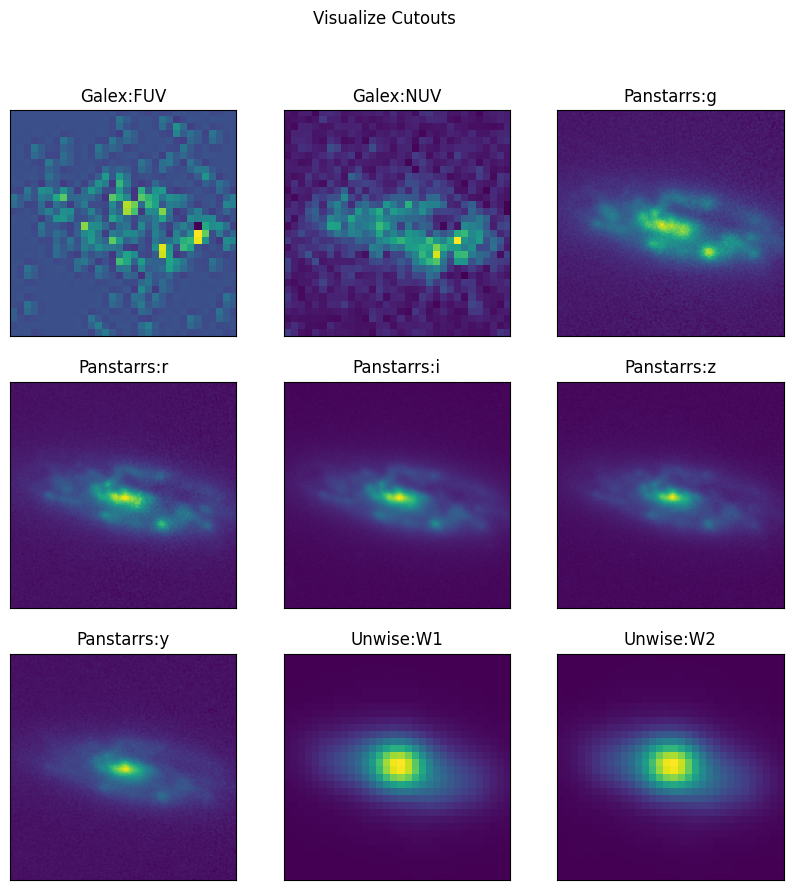

In [ ]:
from mantis_shrimp import pipeline
from mantis_shrimp import models
import matplotlib.pyplot as plt
import os

DEVICE = 'cpu' #pytorch device string; could set to 'cuda'
RA = 197.6144 #decimal degress
DEC = 18.4381 #decimal degrees
USER_INDEX = 0 #arbitrary index used in metadata
SAVEPATH = './MantisShrimp/tmp/' #create a storage solution for downloaded cutout fits

#attempt to create the path if it doesn't exist already
if not(os.path.exists(SAVEPATH)):
    os.makedirs(SAVEPATH)

model, class_bins = models.trained_early(DEVICE)

data = pipeline.get_data(USER_INDEX, RA, DEC, SAVEPATH)

photo_z, PDF, __ = pipeline.evaluate(USER_INDEX,
                                    RA,
                                    DEC,
                                    model=model,
                                    data=data,
                                    SAVEPATH=SAVEPATH,
                                    device=DEVICE)

# This is the expectation value of the PDF which serves as our point estimate
print(photo_z)

# Or you can use the PDF to extract your own photo_z:
# For now let's visualize the PDF.
plt.title('PDF of PhotoZ for RA={:.3f} DEC={:.3f}'.format(RA,DEC))
plt.plot(class_bins,PDF)
plt.show()

visualize_cutouts(data)